In [1]:
import numpy as np
import pandas as pd
from sir_model import apply_sir
from sir_travel_prob import prob_builder
from mc_next_state import mc_next_state 
from builder import matrix_builder
import matplotlib.pyplot as plt
import seaborn as sns


8.410162125678752


In [2]:
beta = 0.5
gamma = 0.13
params = [beta, gamma]
days = 1
times = np.linspace(0, days, days+1)

S_prob = 0.6
I_prob = 0.8
R_prob = 0

TM = pd.read_csv("TransitionMatrixDBS.csv").to_numpy()[:,1:] #NxN, read the transition matrix
S_travelprob = prob_builder(TM,S_prob)  
I_travelprob = prob_builder(TM,I_prob)
R_travelprob = prob_builder(TM,R_prob)

S_tran = matrix_builder(TM, S_travelprob) 
I_tran = matrix_builder(TM, I_travelprob)
R_tran = matrix_builder(TM, R_travelprob)
SIR_tran = np.stack([S_tran,I_tran,R_tran],axis=0) #3xNxN

In [3]:
init_state = pd.read_csv("init_state.csv")

## SIR Plot for Infection Starting in Same Counties as COVID19 with same number of infected (SIR-Markov)

In [44]:
# start infection in first counties covid

### All Counties

In [57]:
S = []
I = []
R = []

def main():
    state = init_state.to_numpy()

    for i in range(90):
        N = apply_sir(pd.DataFrame(state, columns=["S", "I", "R"]), params, times)
        state = mc_next_state(initial_state=N, transition_matrix=SIR_tran)
        S.append(state[:,0].sum())
        I.append(state[:,1].sum())
        R.append(state[:,2].sum())
    return state

og_county = main()

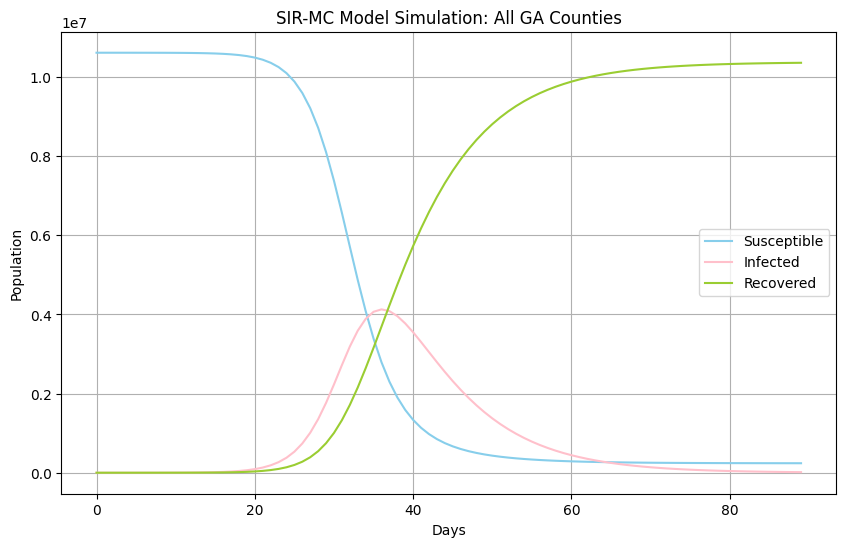

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(S, label='Susceptible', color='skyblue')
plt.plot(I, label='Infected', color='pink')
plt.plot(R, label='Recovered', color='yellowgreen')
plt.title('SIR-MC Model Simulation: All GA Counties')
plt.xlabel('Days')
plt.ylabel('Population')
plt.legend()
plt.grid()

### Just Fulton County

In [47]:
# run model for only one county
S_fulton = []
I_fulton = []
R_fulton = []
fulton_index = 59
S_fulton.append(init_state.iloc[fulton_index,0])
I_fulton.append(init_state.iloc[fulton_index,1])
R_fulton.append(init_state.iloc[fulton_index,2])

def main():
    state = init_state.to_numpy()

    for i in range(90):
        N = apply_sir(pd.DataFrame(state, columns=["S", "I", "R"]), params, times)
        state = mc_next_state(initial_state=N, transition_matrix=SIR_tran)
        # get SIR for fulton county
        S_fulton.append(state[fulton_index,0])
        I_fulton.append(state[fulton_index,1])
        R_fulton.append(state[fulton_index,2])
    return state

og_county = main()

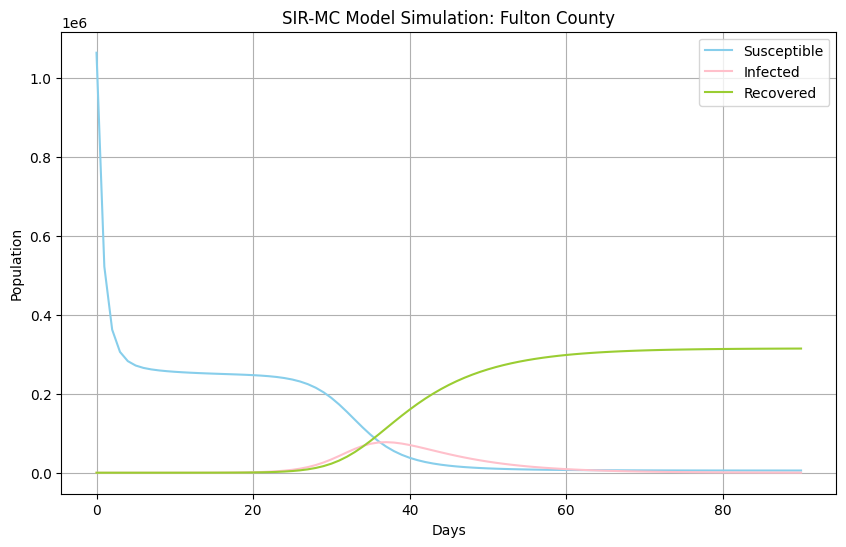

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(S_fulton, label='Susceptible', color='skyblue')
plt.plot(I_fulton, label='Infected', color='pink')
plt.plot(R_fulton, label='Recovered', color='yellowgreen')
plt.title('SIR-MC Model Simulation: Fulton County')
plt.xlabel('Days')
plt.ylabel('Population')
plt.legend()
plt.grid()

### Just Appling County

In [49]:
# run model for only one county
S_appling = []
I_appling = []
R_appling = []
appling_index = 0
S_appling.append(init_state.iloc[appling_index,0])
I_appling.append(init_state.iloc[appling_index,1])
R_appling.append(init_state.iloc[appling_index,2])
def main():
    state = init_state.to_numpy()

    for i in range(90):
        N = apply_sir(pd.DataFrame(state, columns=["S", "I", "R"]), params, times)
        state = mc_next_state(initial_state=N, transition_matrix=SIR_tran)
        # get SIR for fulton county
        S_appling.append(state[appling_index,0])
        I_appling.append(state[appling_index,1])
        R_appling.append(state[appling_index,2])
    return state

og_county = main()

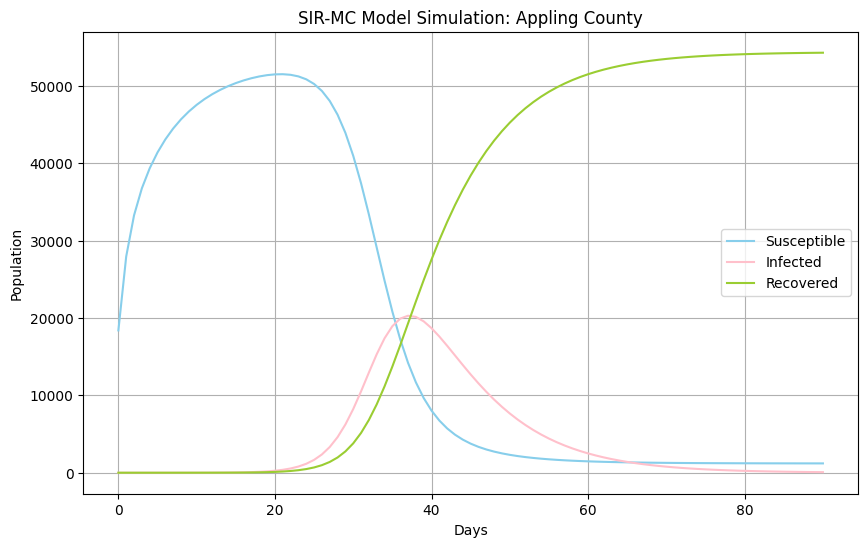

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(S_appling, label='Susceptible', color='skyblue')
plt.plot(I_appling, label='Infected', color='pink')
plt.plot(R_appling, label='Recovered', color='yellowgreen')
plt.title('SIR-MC Model Simulation: Appling County')
plt.xlabel('Days')
plt.ylabel('Population')
plt.legend()
plt.grid()

## SIR Plot for Infection Starting in Same Counties as COVID with Same Number of Infected (SIR ONLY)

### all counties

In [59]:
S = []
I = []
R = []

def main():
    state = init_state.to_numpy()

    for i in range(90):
        state = apply_sir(pd.DataFrame(state, columns=["S", "I", "R"]), params, times)
        S.append(state['S'].sum())
        I.append(state['I'].sum())
        R.append(state['R'].sum())
    return state

og_county = main()

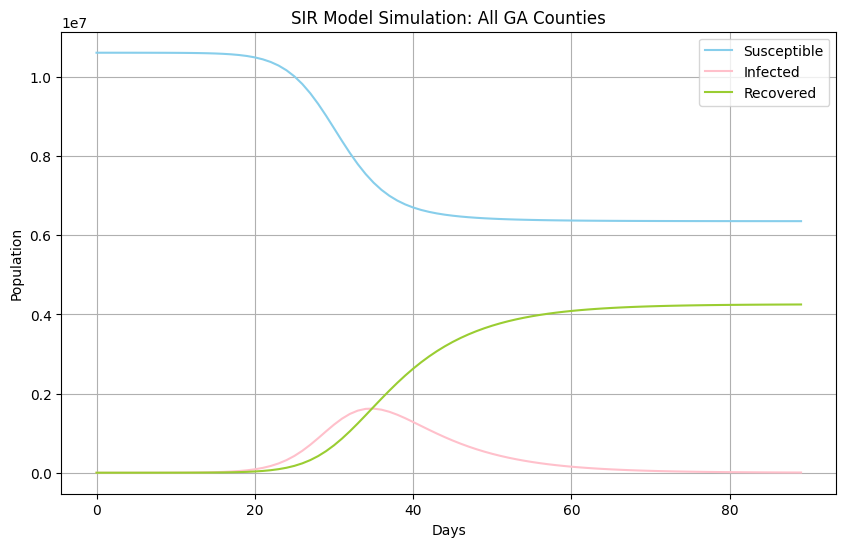

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(S, label='Susceptible', color='skyblue')
plt.plot(I, label='Infected', color='pink')
plt.plot(R, label='Recovered', color='yellowgreen')
plt.title('SIR Model Simulation: All GA Counties')
plt.xlabel('Days')
plt.ylabel('Population')
plt.legend()
plt.grid()

### Just Fulton County

In [53]:
# run model for only one county
S_fulton = []
I_fulton = []
R_fulton = []
fulton_index = 59
S_fulton.append(init_state.iloc[fulton_index,0])
I_fulton.append(init_state.iloc[fulton_index,1])
R_fulton.append(init_state.iloc[fulton_index,2])

def main():
    state = init_state.to_numpy()

    for i in range(90):
        state = apply_sir(pd.DataFrame(state, columns=["S", "I", "R"]), params, times)
        S_fulton.append(state.iloc[fulton_index,0])
        I_fulton.append(state.iloc[fulton_index,1])
        R_fulton.append(state.iloc[fulton_index,2])
    return state

og_county = main()

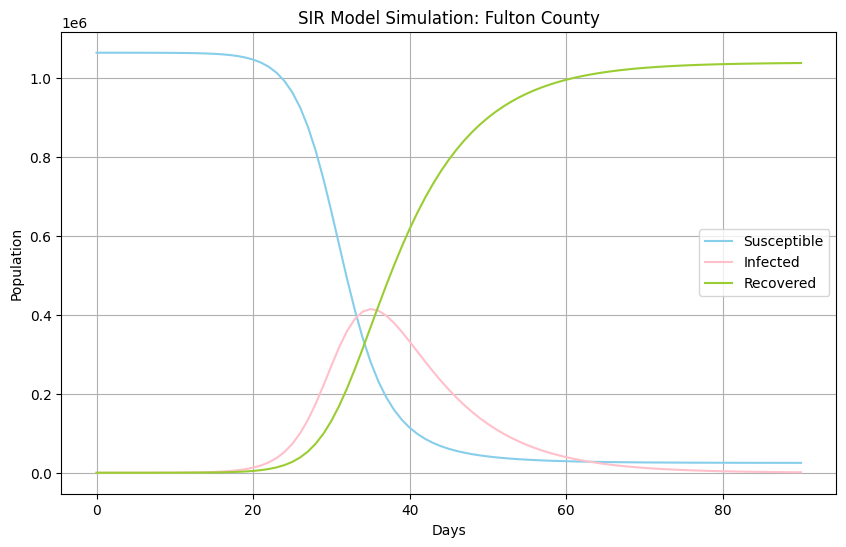

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(S_fulton, label='Susceptible', color='skyblue')
plt.plot(I_fulton, label='Infected', color='pink')
plt.plot(R_fulton, label='Recovered', color='yellowgreen')
plt.title('SIR Model Simulation: Fulton County')
plt.xlabel('Days')
plt.ylabel('Population')
plt.legend()
plt.grid()

### Just Appling County

In [55]:
# run model for only one county
S_appling = []
I_appling = []
R_appling = []
appling_index = 0
S_appling.append(init_state.iloc[appling_index,0])
I_appling.append(init_state.iloc[appling_index,1])
R_appling.append(init_state.iloc[appling_index,2])

def main():
    state = init_state.to_numpy()

    for i in range(90):
        state = apply_sir(pd.DataFrame(state, columns=["S", "I", "R"]), params, times)
        S_appling.append(state.iloc[appling_index,0])
        I_appling.append(state.iloc[appling_index,1])
        R_appling.append(state.iloc[appling_index,2])
    return state

og_county = main()

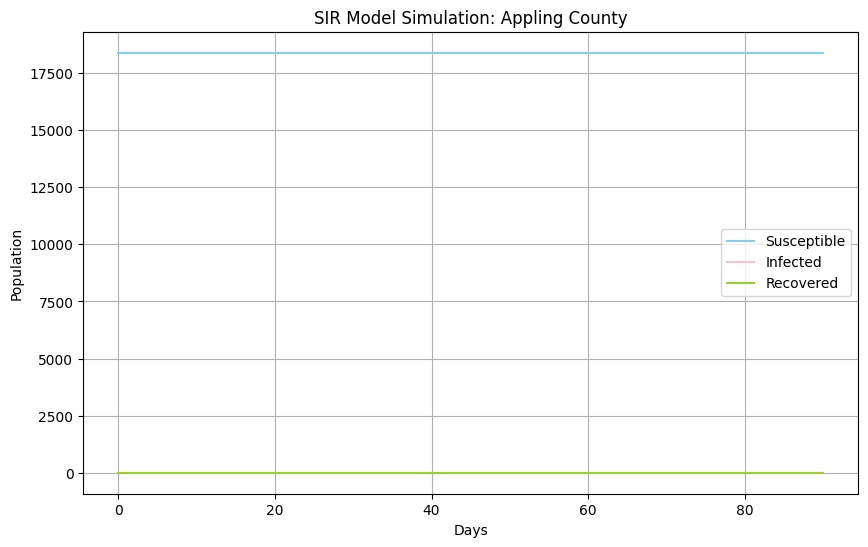

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(S_appling, label='Susceptible', color='skyblue')
plt.plot(I_appling, label='Infected', color='pink')
plt.plot(R_appling, label='Recovered', color='yellowgreen')
plt.title('SIR Model Simulation: Appling County')
plt.xlabel('Days')
plt.ylabel('Population')
plt.legend()
plt.grid()

## SIR Plot for Infection Starting in Highest Population County (Fulton)

In [ ]:
# the county with the highest population starts with 250 infected individuals and the simulations runs for 90 days (3 months)

In [ ]:
S = []
I = []
R = []

def main():
    state = pd.read_csv('init_state.csv').to_numpy()

    for i in range(90):
        N = apply_sir(pd.DataFrame(state, columns=["S", "I", "R"]), params, times)
        state = mc_next_state(initial_state=N, transition_matrix=SIR_tran)
        S.append(state[:,0].sum())
        I.append(state[:,1].sum())
        R.append(state[:,2].sum())
    return state

three_month_max_county = main()


In [9]:
month_max_county = pd.DataFrame(three_month_max_county, columns=["S", "I", "R"])
print(month_max_county)

               S          I              R
0    1275.615882  44.452042    57596.02992
1    1594.077832  52.343965   73326.704305
2     955.534973  37.553802   34669.934337
3     443.297908  21.482631    13249.40904
4     2120.66163   65.10514  113128.486981
..           ...        ...            ...
154  2220.027245  66.896219  117736.381072
155   887.383898  35.701185   31280.078397
156   857.903612   35.71274    32746.37861
157  1057.072125   44.65114   33551.566892
158   1180.68362  45.823077   36362.348433

[159 rows x 3 columns]


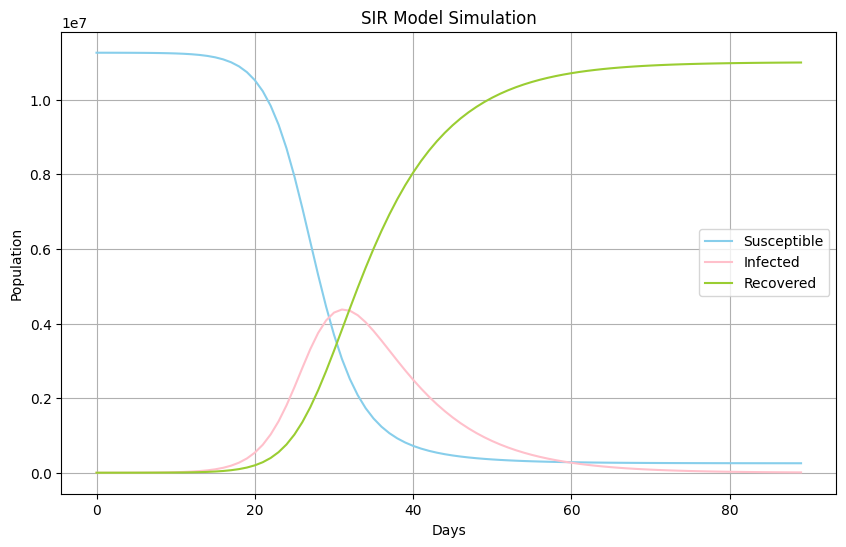

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(S, label='Susceptible', color='skyblue')
plt.plot(I, label='Infected', color='pink')
plt.plot(R, label='Recovered', color='yellowgreen')
plt.title('SIR Model Simulation')
plt.xlabel('Days')
plt.ylabel('Population')
plt.legend()
plt.grid()

## SIR Plot for Infection Starting in 5 Densest Counties

In [ ]:
# 5 counties with the highest density start with 50 infected individuals and the simulation runs for 31 days (1 month)

In [ ]:
county = pd.read_csv('county_pop.csv')

# get the top 5 counties by density
top_five_den = county.nlargest(5, 'densityMi')

county = county.drop(columns=['fips','pop2020','state','stateCode','growthSince2020','slug','areaMi','rank','name','densityMi'])
# order populations same as transition matrix
# sort populations alphabetically
county = county.sort_values(by='county')

In [ ]:
# add SIR columns to county dataframe with SIR as pop2025 values
county = pd.concat([county, pd.DataFrame(columns=['S', 'I', 'R'])], axis=1)
# set S values to pop2025 values
county['S'] = county['pop2025']
# set I values to 0
county['I'] = 0
# set R values to 0
county['R'] = 0
# set I values to 250 for counties in top 5
for i in range(len(county)):
    if county.iloc[i]['county'] in top_five_den['county'].values:
        county.iloc[i, 3] = 50

In [58]:
init_state = county.drop(columns=['county','pop2025'])
init_state = init_state.reset_index(drop=True)

In [61]:
S = []
I = []
R = []
def main():
    state = init_state.to_numpy()
    for i in range(31):
        N = apply_sir(pd.DataFrame(state, columns=["S", "I", "R"]), params, times)
        state = mc_next_state(initial_state=N, transition_matrix=SIR_tran)
        S.append(state[:,0].sum())
        I.append(state[:,1].sum())
        R.append(state[:,2].sum())
    return state

month_max_county = main()


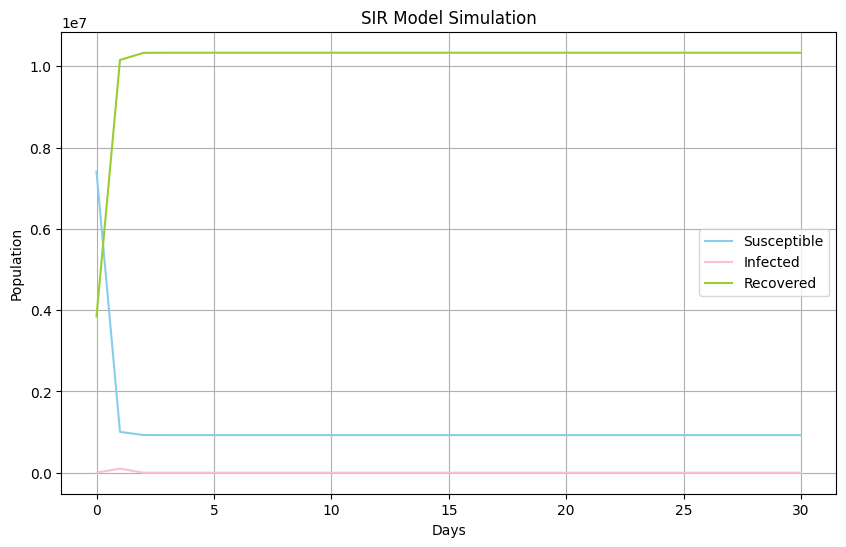

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(S, label='Susceptible', color='skyblue')
plt.plot(I, label='Infected', color='pink')
plt.plot(R, label='Recovered', color='yellowgreen')
plt.title('SIR Model Simulation')
plt.xlabel('Days')
plt.ylabel('Population')
plt.legend()
plt.grid()

## SIR Plot for Infection Starting in 5 Most Populated Counties

In [ ]:
# 5 counties with highest population start with 50 infected people and simulation rins for 31 days (one month)

In [70]:
file_path = 'populations.csv'
def init_state(file_path):
    input = pd.read_csv(file_path)
    input = pd.DataFrame(np.array([input.values.flatten(),[0]*input.shape[0],[0]*input.shape[0]]).T,columns=['S','I','R'])
    # get top 5 populations and set I to 50
    top_five_pop = input.nlargest(5, 'S')
    for i in range(len(input)):
        if input.iloc[i]['S'] in top_five_pop['S'].values:
            input.iloc[i, 1] = 50
    return input
init_state = init_state(file_path)

In [71]:
S = []
I = []
R = []
def main():
    state = init_state.to_numpy()
    for i in range(31):
        N = apply_sir(pd.DataFrame(state, columns=["S", "I", "R"]), params, times)
        state = mc_next_state(initial_state=N, transition_matrix=SIR_tran)
        S.append(state[:,0].sum())
        I.append(state[:,1].sum())
        R.append(state[:,2].sum())
    return state

month_max_county = main()


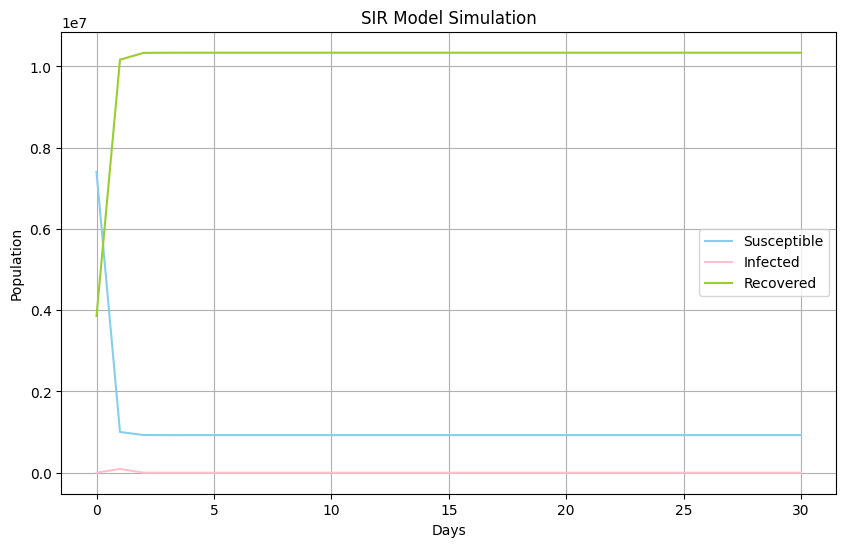

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(S, label='Susceptible', color='skyblue')
plt.plot(I, label='Infected', color='pink')
plt.plot(R, label='Recovered', color='yellowgreen')
plt.title('SIR Model Simulation')
plt.xlabel('Days')
plt.ylabel('Population')
plt.legend()
plt.grid()